<a href="https://colab.research.google.com/github/Manu-Gr/K-Nearest-Neighbours/blob/main/KNN_Diabetes_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###**K Nearest Neighbours (KNN)**



In [ ]:
# KNN Classification
import  pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
from pandas import read_csv
filename = 'pima-indians-diabetes.data.csv'
names = [
    'preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class'
]
dataframe = read_csv(filename, names=names)
array = dataframe.values

In [ ]:
X = array[:, 0:8]
Y = array[:, 8]

In [ ]:
num_folds = 10
kfold = KFold(n_splits=10)

In [ ]:
model = KNeighborsClassifier(n_neighbors=17)
results = cross_val_score(model, X, Y, cv=kfold)

In [ ]:
print(results.mean())

0.7565276828434724


### **Grid Search for Algorithm Tuning**

In [ ]:
# Grid Search for Algorithm Tuning
import numpy
from pandas import read_csv
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

In [ ]:
filename = 'pima-indians-diabetes.data.csv'
names = [
    'preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class'
]
dataframe = read_csv(filename, names=names)
array = dataframe.values
X = array[:, 0:8]
Y = array[:, 8]

In [ ]:
n_neighbors = numpy.array(range(1,40))
param_grid = dict(n_neighbors=n_neighbors)

In [ ]:
model = KNeighborsClassifier()
grid = GridSearchCV(estimator=model, param_grid=param_grid)
grid.fit(X, Y)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39])})

In [ ]:
print(grid.best_score_)
print(grid.best_params_)

0.7578558696205755
{'n_neighbors': 14}


**Train/Test Split Data**

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
train,test= train_test_split(dataframe,test_size=0.3)

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [ ]:
n_neighbors = numpy.array(range(1,40))
param_grid = dict(n_neighbors=n_neighbors)

In [ ]:
model1 = KNeighborsClassifier()
grid1 = GridSearchCV(estimator=model1, param_grid=param_grid)
grid1.fit(X_train, Y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39])})

In [ ]:
print(grid1.best_score_)
print(grid1.best_params_)

0.737417791623399
{'n_neighbors': 24}


In [ ]:
KNN_results1 = cross_val_score(grid1, X_train, Y_train, cv=kfold)
print(KNN_results1.mean())

0.7095387840670859


In [ ]:
KNN_preds1 = grid1.predict(X_train)
pd.crosstab(Y_train,KNN_preds1)

col_0,0.0,1.0
row_0,,
0.0,326,23
1.0,100,88


### **Visualizing the CV results**

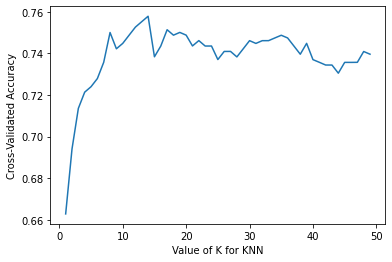

In [ ]:
import matplotlib.pyplot as plt 
%matplotlib inline
# choose k between 1 to 50
k_range = range(1, 50)
k_scores = []
# use iteration to caclulator different k in models, then return the average accuracy based on the cross validation
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, Y, cv=5)
    k_scores.append(scores.mean())
# plot to see clearly
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

###**Plot test accuracy and train accuracy**

In [ ]:
print(train.shape)

(614, 9)


In [ ]:
print(test.shape)

(154, 9)


In [ ]:
from sklearn.neighbors import KNeighborsClassifier as KNC

In [ ]:
train

,preg,plas,pres,skin,test,mass,pedi,age,class
766,1,126,60,0,0,30.1,0.349,47,1
409,1,172,68,49,579,42.4,0.702,28,1
623,0,94,70,27,115,43.5,0.347,21,0
431,3,89,74,16,85,30.4,0.551,38,0
260,3,191,68,15,130,30.9,0.299,34,0
...,...,...,...,...,...,...,...,...,...
238,9,164,84,21,0,30.8,0.831,32,1
162,0,114,80,34,285,44.2,0.167,27,0
31,3,158,76,36,245,31.6,0.851,28,1
112,1,89,76,34,37,31.2,0.192,23,0


In [ ]:
model2 = KNeighborsClassifier()
grid2 = GridSearchCV(estimator=model2, param_grid=param_grid)
grid2.fit(X_test, Y_test)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39])})

In [ ]:
KNN_results2 = cross_val_score(grid1, X_test, Y_test, cv=kfold)
print(KNN_results2.mean())

0.6619565217391303


In [ ]:
KNN_preds2 = grid1.predict(X_test)
pd.crosstab(Y_test,KNN_preds2)

col_0,0.0,1.0
row_0,,
0.0,132,19
1.0,43,37


In [ ]:
accuracy=[]
for i in range(3,50,2):
    neighbour = KNC(n_neighbors=i)
    neighbour.fit(train.iloc[:,0:9],train.iloc[:,-1])
    train_acc= np.mean(neighbour.predict(train.iloc[:,0:9])==train.iloc[:,-1])
    test_acc= np.mean(neighbour.predict(test.iloc[:,0:9])==test.iloc[:,-1])
    accuracy.append([train_acc,test_acc])
print(accuracy)
print(len(accuracy))

[[0.8286778398510242, 0.7272727272727273], [0.7877094972067039, 0.7402597402597403], [0.7690875232774674, 0.7748917748917749], [0.7746741154562383, 0.7619047619047619], [0.7672253258845437, 0.7619047619047619], [0.7653631284916201, 0.7532467532467533], [0.7672253258845437, 0.7619047619047619], [0.7635009310986964, 0.7186147186147186], [0.7653631284916201, 0.7229437229437229], [0.7672253258845437, 0.7359307359307359], [0.7672253258845437, 0.7402597402597403], [0.7653631284916201, 0.7359307359307359], [0.7653631284916201, 0.7662337662337663], [0.7579143389199255, 0.7575757575757576], [0.7635009310986964, 0.7402597402597403], [0.750465549348231, 0.7532467532467533], [0.7392923649906891, 0.7316017316017316], [0.7299813780260708, 0.7402597402597403], [0.7392923649906891, 0.7445887445887446], [0.74487895716946, 0.7489177489177489], [0.7411545623836127, 0.7359307359307359], [0.7392923649906891, 0.7489177489177489], [0.7337057728119181, 0.7402597402597403], [0.7430167597765364, 0.7402597402597

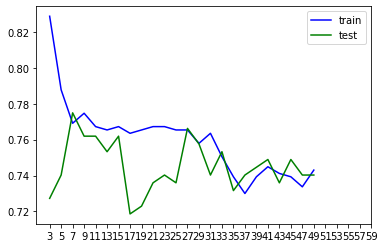

In [ ]:
plt.plot(np.arange(3,50,2),[i[0] for i in accuracy],"b")
plt.plot(np.arange(3,50,2),[i[1] for i in accuracy],"g")
plt.legend(["train","test"])
plt.xticks(np.arange(3,60,2))
plt.show()

In [ ]:
# Model for K=3
neighbour=KNC(n_neighbors=3)

In [ ]:
neighbour.fit(train.iloc[:,0:9],train.iloc[:,-1])
train_acc= np.mean(neighbour.predict(train.iloc[:,0:9])==train.iloc[:,-1])
test_acc= np.mean(neighbour.predict(test.iloc[:,0:9])==test.iloc[:,-1])
print("K=3 : ",train_acc,test_acc)

K=3 :  0.7690875232774674 0.7748917748917749


In [ ]:
# Model for K=5
neighbour=KNC(n_neighbors=5)

In [ ]:
neighbour.fit(train.iloc[:,0:9],train.iloc[:,-1])
train_acc= np.mean(neighbour.predict(train.iloc[:,0:9])==train.iloc[:,-1])
test_acc= np.mean(neighbour.predict(test.iloc[:,0:9])==test.iloc[:,-1])
print("K=5 : ",train_acc,test_acc)

K=5 :  0.7877094972067039 0.7402597402597403


In [ ]:
# Model for K=7
neighbour=KNC(n_neighbors=7)

In [ ]:
neighbour.fit(train.iloc[:,0:9],train.iloc[:,-1])
train_acc= np.mean(neighbour.predict(train.iloc[:,0:9])==train.iloc[:,-1])
test_acc= np.mean(neighbour.predict(test.iloc[:,0:9])==test.iloc[:,-1])
print("K=7 : ",train_acc,test_acc)

K=7 :  0.7877094972067039 0.7402597402597403


In [ ]:
# Model for K=11
neighbour=KNC(n_neighbors=11)

In [ ]:
neighbour.fit(train.iloc[:,0:9],train.iloc[:,-1])
train_acc= np.mean(neighbour.predict(train.iloc[:,0:9])==train.iloc[:,-1])
test_acc= np.mean(neighbour.predict(test.iloc[:,0:9])==test.iloc[:,-1])
print("K=11 : ",train_acc,test_acc)

K=11 :  0.7672253258845437 0.7619047619047619


In [ ]:
# Model for K=14
neighbour=KNC(n_neighbors=14)

In [ ]:
neighbour.fit(train.iloc[:,0:9],train.iloc[:,-1])
train_acc= np.mean(neighbour.predict(train.iloc[:,0:9])==train.iloc[:,-1])
test_acc= np.mean(neighbour.predict(test.iloc[:,0:9])==test.iloc[:,-1])
print("K=14 : ",train_acc,test_acc)

K=14 :  0.7653631284916201 0.7445887445887446


From all the abobe results we can see that, For K = 7 the model gives best accuracy